# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



In [3]:
# Print the city count to confirm sufficient count
print(type(cities))

<class 'list'>


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# build df
city_df = pd.DataFrame(cities)
city_df.columns=["City"]
city_df["Lat"]=""
city_df["Lng"]=""
city_df["Max_Temp"]=""
city_df["Humidity"]=""
city_df["Cloudiness"]=""
city_df["Wind_Speed"]=""
city_df["Country"]=""
city_df["Date"]=""
#city_df["City ID"]=""  todo needed?

city_df = city_df.set_index("City")

city_df

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City,,,,,,,,
yellowknife,,,,,,,,
wuxue,,,,,,,,
shamkhal,,,,,,,,
linchuan,,,,,,,,
grand river south east,,,,,,,,
...,...,...,...,...,...,...,...,...
barra do garcas,,,,,,,,
koutsouras,,,,,,,,
upington,,,,,,,,


In [14]:
# example url from the API docs: api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
count=0
for city in cities:
#    city_df.loc[city,"City ID"]=count
    #todo if need different unit of measure on temp need to update the url
    weather_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}'


#    fuck= requests.get(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}').json()

    #todo decide if going to keep reindex above. if don't keep it, then don't need to regen a counter here
    print(f"Log - call {count} for {city}")
    weather_resp=requests.get(weather_url).json()
#    print(weather_resp["main"]["temp_max"])
    count+=1
    try:
        city_df.loc[city,"Lat"]=weather_resp["coord"]["lat"]
        city_df.loc[city,"Lng"]=weather_resp["coord"]["lon"]
        city_df.loc[city,"Max_Temp"]=weather_resp["main"]["temp_max"]
        city_df.loc[city,"Humidity"]=weather_resp["main"]["humidity"]
        city_df.loc[city,"Cloudiness"]=weather_resp["clouds"]["all"]
        city_df.loc[city,"Wind_Speed"]=weather_resp["wind"]["speed"]
        city_df.loc[city,"Country"]=weather_resp["sys"]["country"]
        city_df.loc[city,"Date"]=weather_resp["dt"]
    except:
        print(f"Issue with city {city}.", end=" ")  #change end so it's not a new line
        city_df.loc[city,"Lat"]="NoDataFound"
        try:
            print("API message: "+weather_resp["message"])  #if the API returned an error it'll be here
        except:
            print(" ")   #if no message data found, print something to get a newline for next log statement

#    break  testing break 
    # Add a sleep interval between queries to stay within API query limits
    time.sleep(1)
    
#city_df.head()   

Log - call 0 for yellowknife
Log - call 1 for wuxue
Log - call 2 for shamkhal
Log - call 3 for linchuan
Issue with city linchuan city not found
Log - call 4 for grand river south east
Issue with city grand river south east city not found
Log - call 5 for belushya guba
Issue with city belushya guba city not found
Log - call 6 for vaini
Log - call 7 for esperance
Log - call 8 for barentsburg
Issue with city barentsburg city not found
Log - call 9 for tabiauea
Issue with city tabiauea city not found
Log - call 10 for busselton
Log - call 11 for byron bay
Log - call 12 for ponta do sol
Log - call 13 for cape town
Log - call 14 for college
Log - call 15 for mahebourg
Log - call 16 for faanui
Log - call 17 for punta arenas
Log - call 18 for luanda
Log - call 19 for port elizabeth
Log - call 20 for dembi dolo
Log - call 21 for westport
Log - call 22 for rosarito
Log - call 23 for mataura
Log - call 24 for waingapu
Log - call 25 for sabha
Log - call 26 for arraial do cabo
Log - call 27 for dik

Log - call 263 for mitu
Log - call 264 for gobabis
Log - call 265 for severo-yeniseyskiy
Log - call 266 for baykit
Log - call 267 for kuche
Issue with city kuche city not found
Log - call 268 for aktau
Log - call 269 for saleaula
Issue with city saleaula city not found
Log - call 270 for asau
Log - call 271 for tumannyy
Issue with city tumannyy city not found
Log - call 272 for fortuna
Log - call 273 for port lincoln
Log - call 274 for port hardy
Log - call 275 for svarstad
Log - call 276 for dingle
Log - call 277 for burns lake
Log - call 278 for kahului
Log - call 279 for warrington
Log - call 280 for beringovskiy
Log - call 281 for sistranda
Log - call 282 for kisangani
Log - call 283 for ca mau
Log - call 284 for llanes
Log - call 285 for dunedin
Log - call 286 for bethel
Log - call 287 for kaeo
Log - call 288 for sedan
Log - call 289 for brookhaven
Log - call 290 for port hedland
Log - call 291 for sao filipe
Log - call 292 for carballo
Log - call 293 for maniitsoq
Log - call 294 

Log - call 528 for tatvan
Log - call 529 for buala
Log - call 530 for ayan
Log - call 531 for san andres
Log - call 532 for atikokan
Log - call 533 for airai
Log - call 534 for grafton
Log - call 535 for myaundzha
Log - call 536 for marcona
Issue with city marcona city not found
Log - call 537 for mae sai
Log - call 538 for boa vista
Log - call 539 for poum
Log - call 540 for tyukalinsk
Log - call 541 for ugoofaaru
Log - call 542 for pisco
Log - call 543 for bonavista
Log - call 544 for hirara
Log - call 545 for sainte-marie
Log - call 546 for doctor pedro p. pena
Issue with city doctor pedro p. pena city not found
Log - call 547 for syracuse
Log - call 548 for mersing
Log - call 549 for arco
Log - call 550 for broome
Log - call 551 for svolvaer
Log - call 552 for barbosa ferraz
Log - call 553 for straldza
Issue with city straldza city not found
Log - call 554 for havre-saint-pierre
Log - call 555 for iralaya
Log - call 556 for concepcion del uruguay
Log - call 557 for aguas vermelhas


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#remove the rows where the city wasn't found by the weather api
city_df=city_df.loc[city_df["Lat"]!='NoDataFound']

#redo the index so there's a continous number iterator for the first value of each row of the csv
city_df = city_df.reset_index()
city_df.index.name="City_ID"

In [16]:
# reindexed 2x so need to drop unneeded column
#del city_df["City_ID"]

# reorder columns
city_df=city_df[["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max_Temp","Wind_Speed"]]
city_df.to_csv("../output_data/cities.csv", index=True)

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
City_ID,,,,,,,,,
0,yellowknife,1,CA,1612722042,66,62.456,-114.353,-40,5.75
1,wuxue,100,CN,1612722305,90,29.8506,115.552,51.66,3.22
2,shamkhal,90,RU,1612722306,80,43.0596,47.3373,32,17.9
3,vaini,75,TO,1612722306,89,-21.2,-175.2,78.8,12.66
4,esperance,75,AU,1612722307,88,-33.8667,121.9,62.6,11.5


In [21]:
#fix stuff.  Ran population 2x and acdentally added a bunch of stuff to the df (todo Double check this so won't happen in future)
#city_df = city_df.loc[0:525]
city_df.shape

(526, 9)

In [61]:
aggSummStats = city_df[["Lat","Lng","Max_Temp","Humidity","Cloudiness","Wind_Speed","Date"]].agg(["count","mean","std","min"#,"std","sem","sem"   #need to add quartile stuff here
                            ,"max"])
print(aggSummStats)

quantiles = city_df[["Lat","Lng","Max_Temp","Humidity","Cloudiness","Wind_Speed","Date"]].quantile([.25,.5,.75])


#city_df.dtypes
#wtf_df=city_df
#print(wtf_df.dtypes)
#wft_df.Lat= wtf_df.Lat.astype(float)
#wtf_df[["Lat","Lng","Max_Temp","Humidity","Cloudiness","Wind_Speed","Date"]]=wtf_df[["Lat","Lng","Max_Temp","Humidity","Cloudiness","Wind_Speed","Date"]].astype(float)
#city_df[["Lat","Lng","Max_Temp","Humidity","Cloudiness","Wind_Speed","Date"]].astype(float).agg('describe')[['25%', '50%', '75%', 'count']]
#city_df[["Lat","Lng"]].astype(float).agg('describe')[['25%', '50%', '75%', 'count']]
#aggSummStats
#print(wtf_df.dtypes)
#wtf_df.Lat.agg('describe')[['25%', '50%', '75%', 'count']]
#print(aggSummStats.head())
#wtf_df[["Lat","Lng","Max_Temp","Humidity","Cloudiness","Wind_Speed","Date"]].quantile([.25,.5,.75])

              Lat         Lng    Max_Temp    Humidity  Cloudiness  Wind_Speed  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean    19.967523   21.157024   50.524981   72.441065   54.682510    8.916540   
std     33.439177   89.184007   32.239489   19.409653   37.313293    6.341623   
min    -54.800000 -175.200000  -43.600000    9.000000    0.000000    0.270000   
max     78.218600  179.316700   95.360000  100.000000  100.000000   47.180000   

               Date  
count  5.260000e+02  
mean   1.612722e+09  
std    7.617374e+01  
min    1.612722e+09  
max    1.612722e+09  


,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
0.25,-6.97110,-53.625125,28.48,63.25,20.0,4.1875,1.612722e+09
0.50,24.44385,21.953150,61.00,77.00,65.0,7.1950,1.612722e+09
0.75,49.05445,99.601950,77.73,86.00,90.0,12.2200,1.612722e+09


In [71]:
#quantiles = city_df[["Lat","Lng","Max_Temp","Humidity","Cloudiness","Wind_Speed","Date"]].quantile([.25,.5,.75])
#summStats=aggSummStats.append(quantiles)
#summStats.sort_index('count', 'mean', 'std', 'min', 'max', 0.25, 0.5, 0.75)
summStats

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,5.260000e+02
mean,19.967523,21.157024,50.524981,72.441065,54.682510,8.916540,1.612722e+09
std,33.439177,89.184007,32.239489,19.409653,37.313293,6.341623,7.617374e+01
min,-54.800000,-175.200000,-43.600000,9.000000,0.000000,0.270000,1.612722e+09
max,78.218600,179.316700,95.360000,100.000000,100.000000,47.180000,1.612722e+09
0.25,-6.971100,-53.625125,28.480000,63.250000,20.000000,4.187500,1.612722e+09
0.5,24.443850,21.953150,61.000000,77.000000,65.000000,7.195000,1.612722e+09
0.75,49.054450,99.601950,77.730000,86.000000,90.000000,12.220000,1.612722e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [73]:
#max Humitidy shown in summStats is 100% no values over so no cities to remove.

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
City_ID,,,,,,,,,
0,yellowknife,1.0,CA,1.612722e+09,66.0,62.4560,-114.3525,-40.00,5.75
1,wuxue,100.0,CN,1.612722e+09,90.0,29.8506,115.5525,51.66,3.22
2,shamkhal,90.0,RU,1.612722e+09,80.0,43.0596,47.3373,32.00,17.90
3,vaini,75.0,TO,1.612722e+09,89.0,-21.2000,-175.2000,78.80,12.66
4,esperance,75.0,AU,1.612722e+09,88.0,-33.8667,121.9000,62.60,11.50
...,...,...,...,...,...,...,...,...,...
521,abu kamal,0.0,SY,1.612722e+09,60.0,34.4506,40.9171,59.36,7.65
522,turka,100.0,UA,1.612722e+09,86.0,49.1541,23.0297,32.00,3.98
523,shagamu,86.0,NG,1.612722e+09,60.0,6.8432,3.6478,86.00,7.78


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

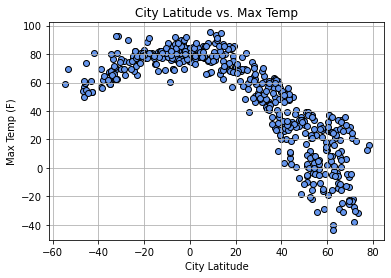

In [86]:
cityLats = city_df.Lat
cityMaxTemps = city_df.Max_Temp
plt.scatter(cityLats,cityMaxTemps,marker="o",edgecolors="black", facecolors="cornflowerblue")
plt.title("City Latitude vs. Max Temp")
plt.xlabel("City Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)
#plt.xlim(14, 26)
#plt.ylim(34, 47)
plt.show()

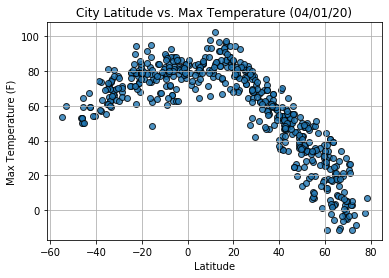

## Latitude vs. Humidity Plot

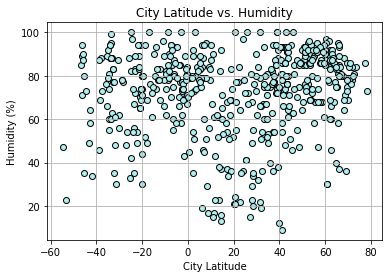

In [87]:
plt.scatter(cityLats,city_df.Humidity,marker="o",edgecolors="black", facecolors="paleturquoise")
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
#plt.xlim(14, 26)
#plt.ylim(34, 47)
plt.show()

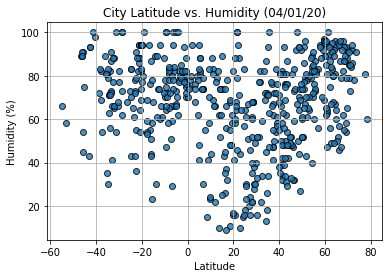

## Latitude vs. Cloudiness Plot

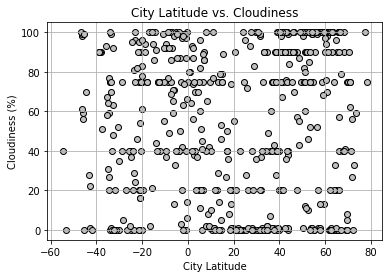

In [88]:
plt.scatter(cityLats,city_df.Cloudiness,marker="o",edgecolors="black", facecolors="silver")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
#plt.xlim(14, 26)
#plt.ylim(34, 47)
plt.show()

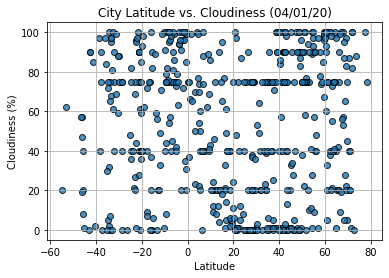

## Latitude vs. Wind Speed Plot

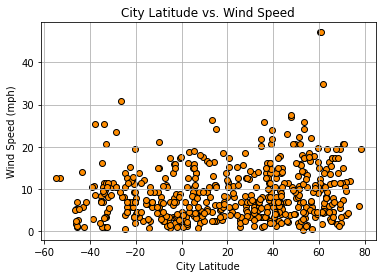

In [89]:
plt.scatter(cityLats,city_df.Wind_Speed,marker="o",edgecolors="black", facecolors="darkorange")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
#plt.xlim(14, 26)
#plt.ylim(34, 47)
plt.show()

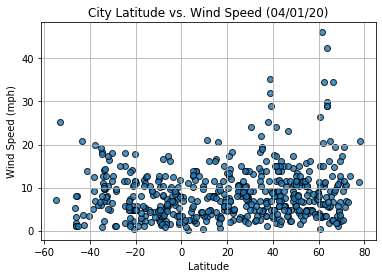

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


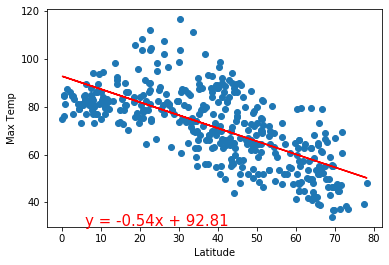

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


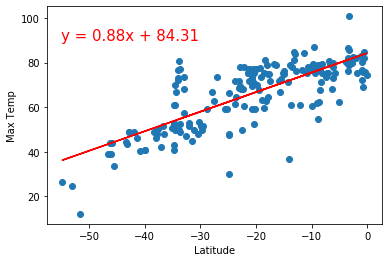

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


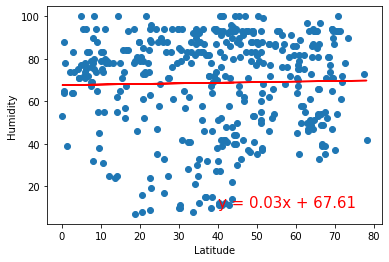

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


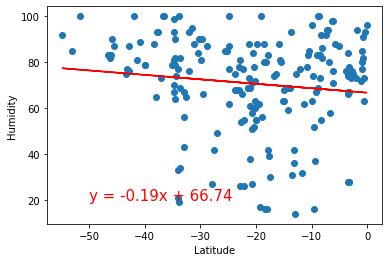

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


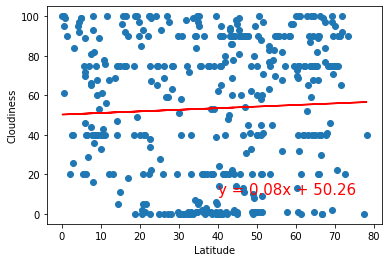

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


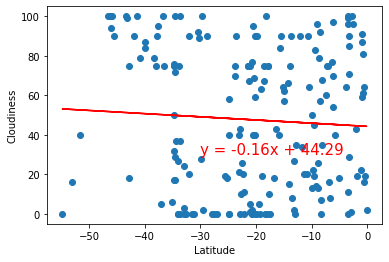

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


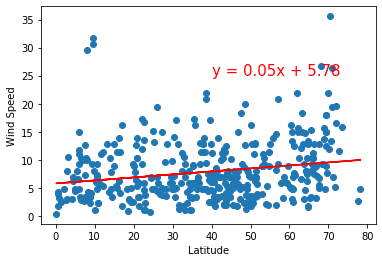

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


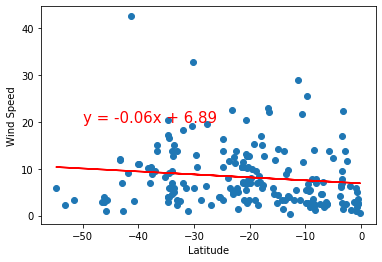